<a href="https://colab.research.google.com/github/rynB2/AI/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

*   **sklearn** is used to generate our bag of words vector, and to implement our decision tree
*   **nltk** is used for tokenization and to find the ngrams of our data 
*   **pandas** is used to manage and manipulate dataframes
*   **numpy** to manage arrays
*   **tensorflow_datasets** to import our dataset
*   **Counter** to find top 20 unigrams and bigrams
*   **WordCloud** to generate a WordCloud of most used unigrams
*   **matplotlib** to plot our data, used for WordCloud and sklearn's decision tree



In [1]:
import sklearn
import nltk
import pandas as pd
import numpy as np

import tensorflow_datasets as tfds

from collections import Counter

from wordcloud import WordCloud, STOPWORDS

nltk.download('punkt')
from nltk import word_tokenize
from nltk.util import ngrams

import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree as tr
from sklearn.tree import DecisionTreeClassifier


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Importing the IMBD dataset



In [2]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [3]:
all_sentences = np.concatenate((train_examples, test_examples), axis=0) #concatenate so that we can use full dataset for unigrams etc
all_labels = np.concatenate((train_labels, test_labels), axis=0)

## Creating a Pandas dataframe

We create a seperate dataframe for both sentences and labels. We create new dataframes from both the sentences and labels dataframes for use in sklearn's CountVectorizer, as colab is unable to handle a vector of the size of the bag of words output of the full dataframe. The new dataframes are randomly sampled from the original dataframes, using the same seed so that the sentences are linked to the correct labels.

In [4]:
df = pd.DataFrame(data=all_sentences, index=None, columns=None) 
df_labels = pd.DataFrame(data=all_labels, index=None, columns=None)

df_str = df[0].str.decode("utf-8")
df_str.name = 'sentence'

df_str_subset = df_str.sample(frac=0.25, replace=True, random_state=1) 
df_labels_subset = df_labels.sample(frac=0.25, replace=True, random_state=1) 

## Defining functions that find unigrams and bigrams

In [5]:
def extract_unigram(sentences): #extracts unigrams, code from practical

  tokens = []
  for sentence in df_str:
    tok = word_tokenize(sentence)
    for t in tok:
      tokens.append(t)
  return tokens

In [6]:
def extract_bigram(sentences): #extracts bigrams, code from practical

  all_bigrams = []
  for sentence in df_str:
    token = word_tokenize(sentence)
    bigrams = ngrams(token,2)
    for b in bigrams:
      all_bigrams.append(b)
  return all_bigrams

In [7]:
extracted_unigrams = extract_unigram(df_str)

In [8]:
extracted_bigrams = extract_bigram(df_str)

## Displaying the top 20 unigrams & bigrams and the number of occurances.

In [9]:
Counter(extracted_unigrams).most_common(20)

[('the', 573267),
 (',', 544030),
 ('.', 469238),
 ('a', 308958),
 ('and', 308851),
 ('of', 285071),
 ('to', 263638),
 ('is', 214673),
 ('/', 202421),
 ('>', 202250),
 ('<', 202094),
 ('br', 201948),
 ('in', 173098),
 ('I', 162902),
 ('it', 151645),
 ('that', 137640),
 ("'s", 121758),
 ('this', 120356),
 ('was', 99066),
 ('The', 87638)]

In [10]:
Counter(extracted_bigrams).most_common(20)

[(('<', 'br'), 201948),
 (('br', '/'), 201948),
 (('/', '>'), 201948),
 (('>', '<'), 101016),
 (('of', 'the'), 75037),
 ((',', 'and'), 58500),
 (('.', 'The'), 50783),
 (('in', 'the'), 46160),
 ((',', 'but'), 41646),
 (('.', 'I'), 37488),
 ((',', 'the'), 32190),
 (('.', 'It'), 27378),
 (('is', 'a'), 25750),
 (('this', 'movie'), 24645),
 (('and', 'the'), 24026),
 (('to', 'the'), 23074),
 (('to', 'be'), 22872),
 (('the', 'film'), 21530),
 (('it', "'s"), 21438),
 ((',', 'I'), 20704)]


## Creating a wordcloud to show most popular unigrams in the dataset. 
Stopwords filtered out to increase clarity and information gain.

In [5]:
stopwords_set = {"n't","movie", "br", ",", "<", ">", ".", ":", 'film', "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"} #"words" to be excluded from wordcloud


In [45]:
str_unigrams=(" ").join(extracted_unigrams) 
wordcloud = WordCloud(width = 1280, height = 720, 
                background_color ='black', 
                stopwords = stopwords_set, 
                min_font_size = 16,).generate(str_unigrams) 

Plotting the wordcloud

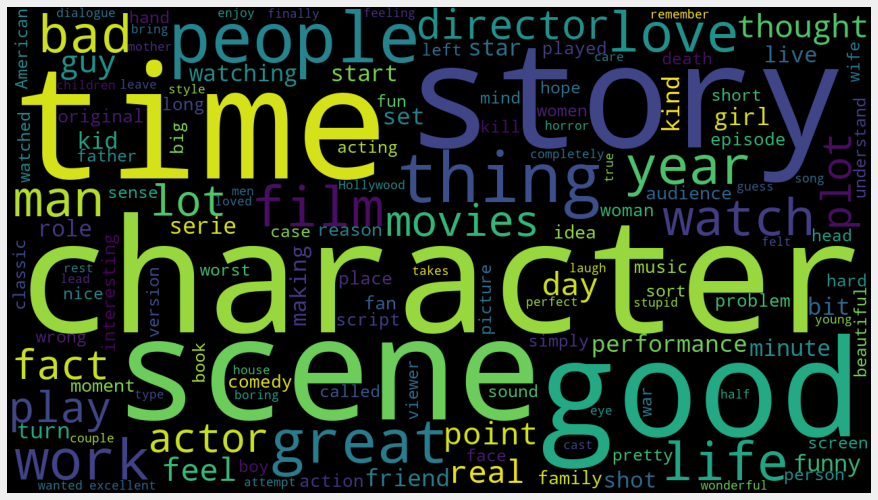

In [46]:
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Create our bag of words model

The first line initialises the vectorizer, the second learns the vocabulary and returns the document-term matrix

Removing stopwords (defined above) improves our accuracy by 1%

In [6]:
vectorizer = CountVectorizer(stop_words= stopwords_set)
sentences_as_bag_of_words = vectorizer.fit_transform(df_str_subset)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Transform our document-term matrix into an array, and create pandas dataframe from it

In [7]:
bow_vectors = sentences_as_bag_of_words.toarray()

In [8]:
words_dataframe = pd.DataFrame(bow_vectors)     

Split the dataset into training and testing sets for use in our decision tree classifier. 70% is used for training and 30% for testing as is standard. This was found to give the best accuracy.

In [9]:
train_sentences = words_dataframe.iloc[:8750, :-1]
test_sentences = words_dataframe.iloc[8750:,:-1]
train_labels = df_labels_subset.iloc[:8750,-1]
test_labels = df_labels_subset.iloc[8750:,-1]

##Create decision tree classifier
Using sklearn's decision tree classifier, and using entropy as the measure of the quality of a split.

In [10]:
tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_sentences,train_labels)

Returns the mean accuracy on the given test data and labels.

In [11]:
accuracy = tree.score(test_sentences,test_labels)*100
print("Accuracy: {}%".format(accuracy))

Accuracy: 76.32%


Plots our tree.

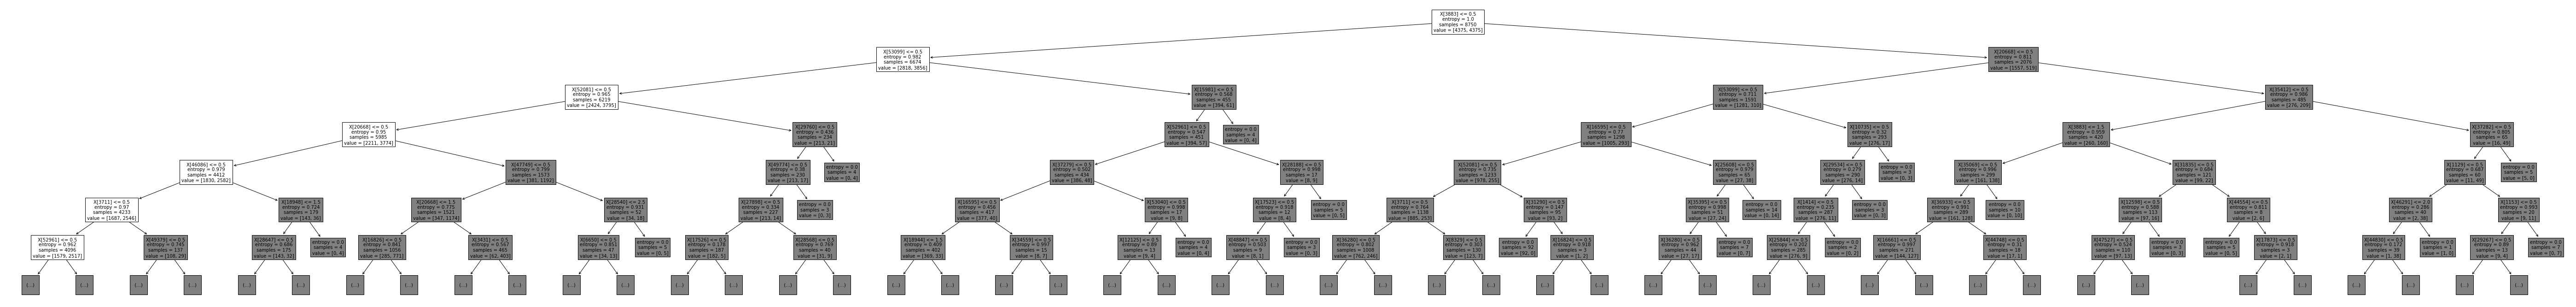

In [13]:
fig, ax = plt.subplots(figsize=(100, 12))
tr.plot_tree(tree, max_depth=6, fontsize=10)
plt.show()